# Employment Information

## Author: Ram Saran Vuppuluri

### Introduction

Kaggle had initiated an industry-wide survey in 2017 that presents a truly comprehensive view of the state of data science and machine learning. In 2018, the study was live for a week in October and had collected responses from 23,859 individuals.

Data set used for the analysis is has 390+ columns. Not all columns are needed at any given point of the study. For this reason, the notebook is further divided into multiple subsections which will start with a business question, followed by data analysis. Only the columns that are related to the business question are extracted for analysis.

Furthermore, we are persisting extracted columns into separate csv files that are utilized for generating visualizations using Tableau for Medium blog post.

__One significant advantage with this approach is we are not ignoring the whole row if the respondent has not to answer specific questions. We are going to include all the answers (non-freeform) in the analysis.__

In this notebook, we will analyze the Employment information of survey takers. 

In [1]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def generate_vertical_countplot(x, xlabel='', figName=None, figSize=(8, 6)):
    '''
    This method will generate vertical Seaborn countplot.

    :param x: x parameter

    :param xlabel: x axis label

    :param figName: file name by which it need to be stored.

    :param figSize: plot figure size.

    :return: None
    '''
    sns.set(rc={'figure.figsize': figSize})

    ax = sns.countplot(x=x)

    plt.xlabel(xlabel)
    if figName != None:
        ax.get_figure().savefig(figName)
    plt.show(ax);

In [3]:
def generate_horizontal_countplot(y, ylabel='', figName=None, figSize=(12, 10)):
    '''
    This method will generate horizontal Seaborn countplot/

    :param y: y parameter

    :param ylabel: y axis label

    :param figName: file name by which it need to be stored

    :param figSize: plot figure size.

    :return: None
    '''
    sns.set(rc={'figure.figsize': figSize})

    ax = sns.countplot(y=y)

    plt.ylabel(ylabel)

    if figName != None:
        ax.get_figure().savefig(figName)
    plt.show(ax);

In [4]:
multipleChoiceDF = pd.read_csv('../multipleChoiceResponses.csv',low_memory=False)

In [5]:
employmentDF = multipleChoiceDF[['Q6','Q7','Q8','Q9','Q10']]

In [6]:
employmentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 5 columns):
Q6     22901 non-null object
Q7     21686 non-null object
Q8     21102 non-null object
Q9     20186 non-null object
Q10    20670 non-null object
dtypes: object(5)
memory usage: 932.1+ KB


In [7]:
employmentDF.head()

,Q6,Q7,Q8,Q9,Q10
0,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...
1,Consultant,Other,NaN,NaN,I do not know
2,Other,Manufacturing/Fabrication,5-10,"10-20,000",No (we do not use ML methods)
3,Data Scientist,I am a student,0-1,"0-10,000",I do not know
4,Not employed,NaN,NaN,NaN,NaN


From the visual and programmatic analysis:
* There are rows with missing data, we will not include these records in our report.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* Column names are not informative, we will rename columns with more informative names.

In [8]:
employmentDF.drop([0],inplace=True)
employmentDF.reset_index(drop=True,inplace=True)

In [9]:
employmentDF.head()

,Q6,Q7,Q8,Q9,Q10
0,Consultant,Other,NaN,NaN,I do not know
1,Other,Manufacturing/Fabrication,5-10,"10-20,000",No (we do not use ML methods)
2,Data Scientist,I am a student,0-1,"0-10,000",I do not know
3,Not employed,NaN,NaN,NaN,NaN
4,Data Analyst,I am a student,0-1,"0-10,000",I do not know


In [10]:
employmentDF.rename(columns={"Q6":"Job_Title",
                             "Q7":"Industry",
                             "Q8":"Experience_In_Current_Role",
                             "Q9":"Annual_Compensation",
                             "Q10":"ML_In_Use"},inplace = True)

In [11]:
employmentDF.head()

,Job_Title,Industry,Experience_In_Current_Role,Annual_Compensation,ML_In_Use
0,Consultant,Other,NaN,NaN,I do not know
1,Other,Manufacturing/Fabrication,5-10,"10-20,000",No (we do not use ML methods)
2,Data Scientist,I am a student,0-1,"0-10,000",I do not know
3,Not employed,NaN,NaN,NaN,NaN
4,Data Analyst,I am a student,0-1,"0-10,000",I do not know


### What is the title most similar to your current role?

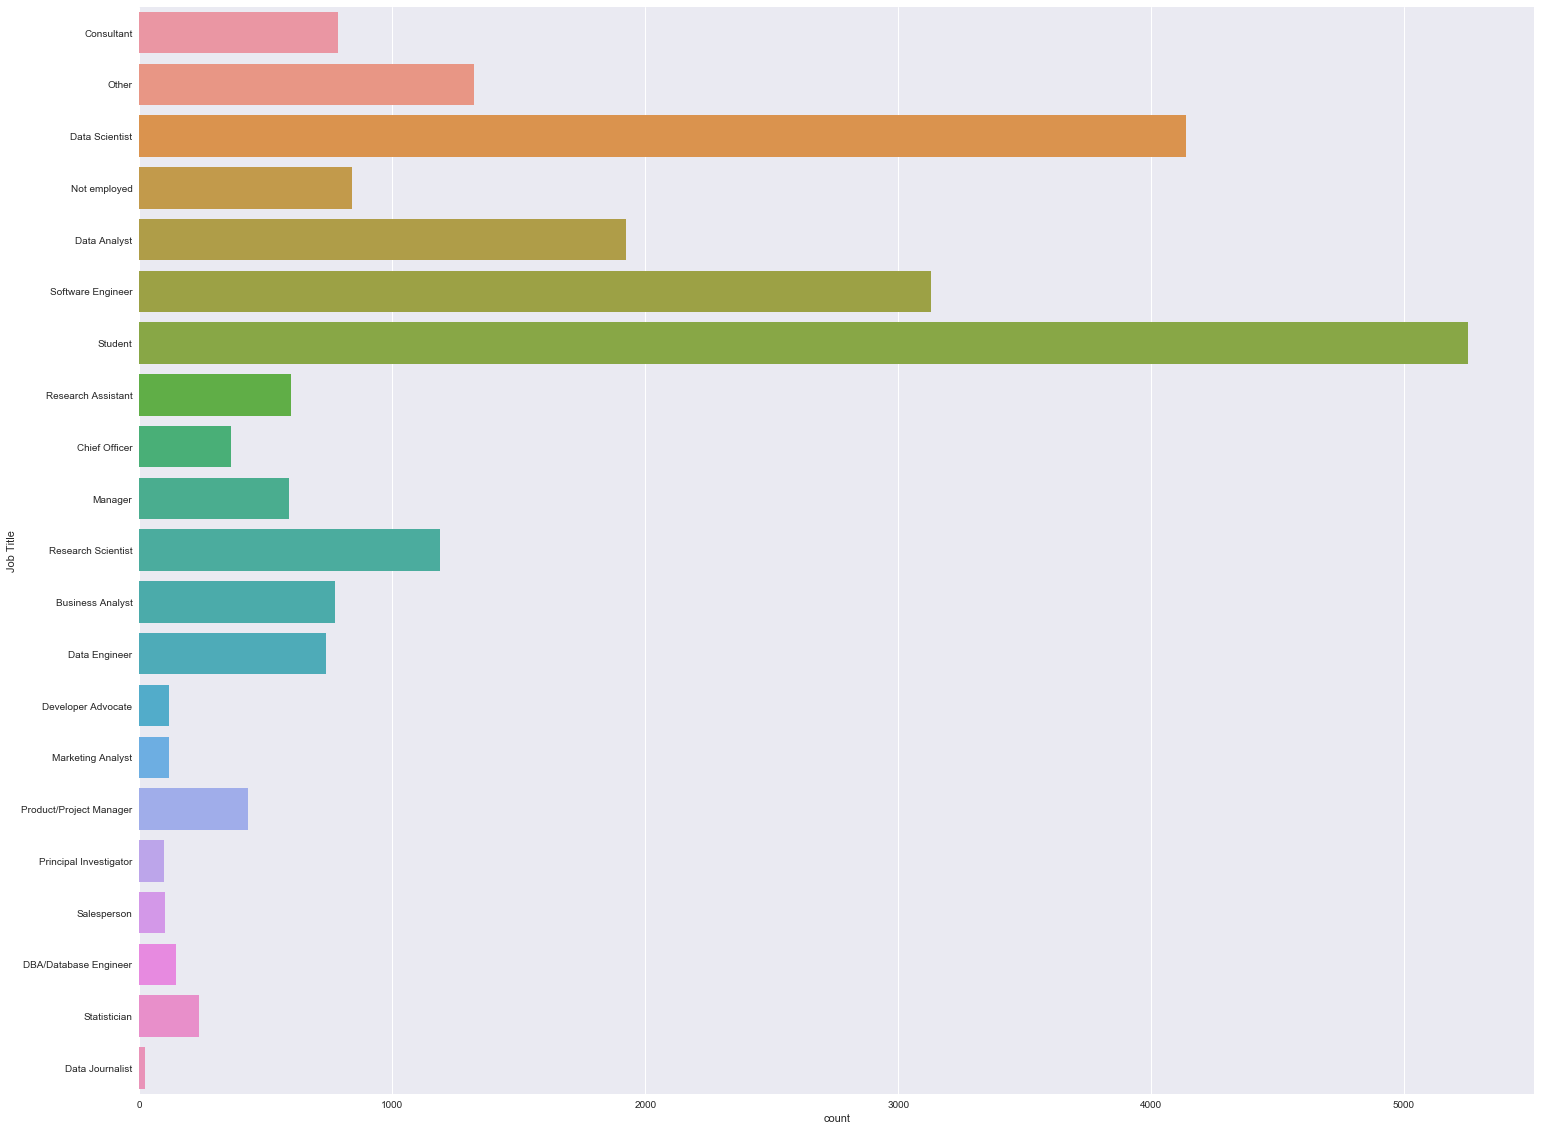

In [12]:
generate_horizontal_countplot(y=employmentDF.Job_Title,
                             figSize=(25,20),
                             ylabel = 'Job Title',
                             figName = 'Job Title.jpeg')

### In what industry is your current employed? 

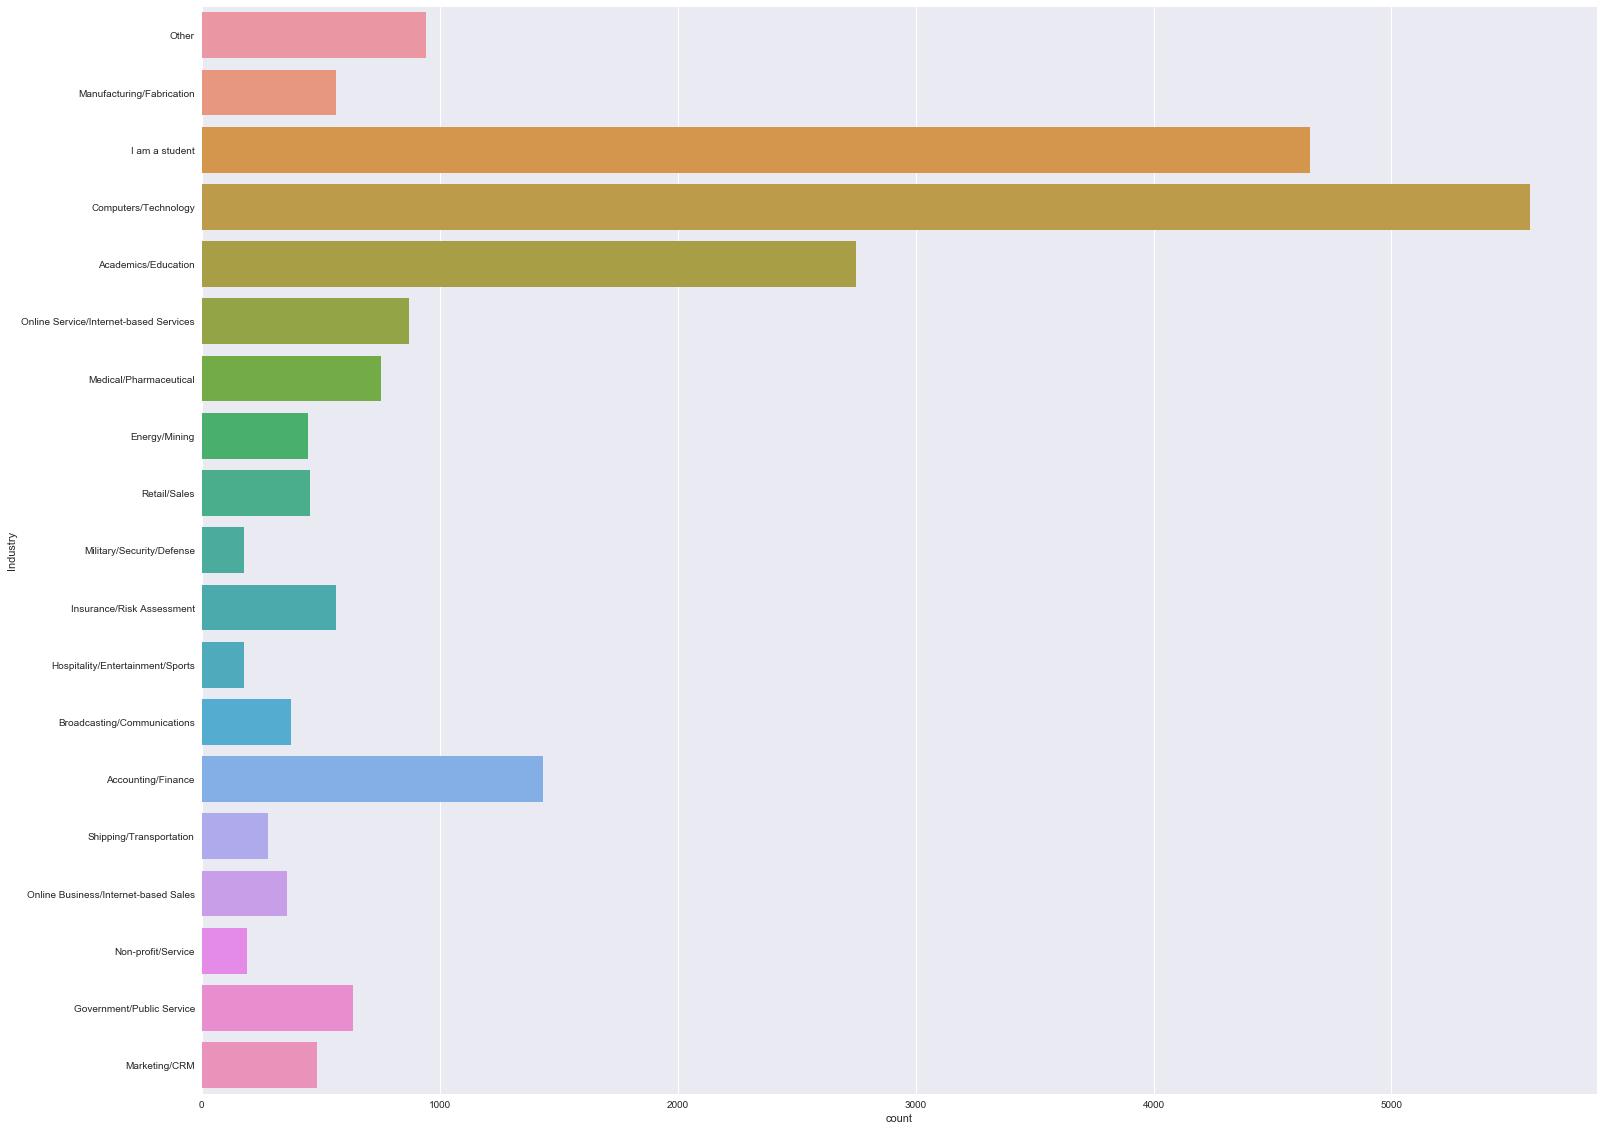

In [13]:
generate_horizontal_countplot(y=employmentDF.Industry,
                             figSize=(25,20),
                             ylabel = 'Industry',
                             figName = 'Industry.jpeg')

### How many years of experience do you have in your current position?

In [14]:
employmentDF['Experience_In_Current_Role'] = employmentDF.Experience_In_Current_Role.fillna("0")

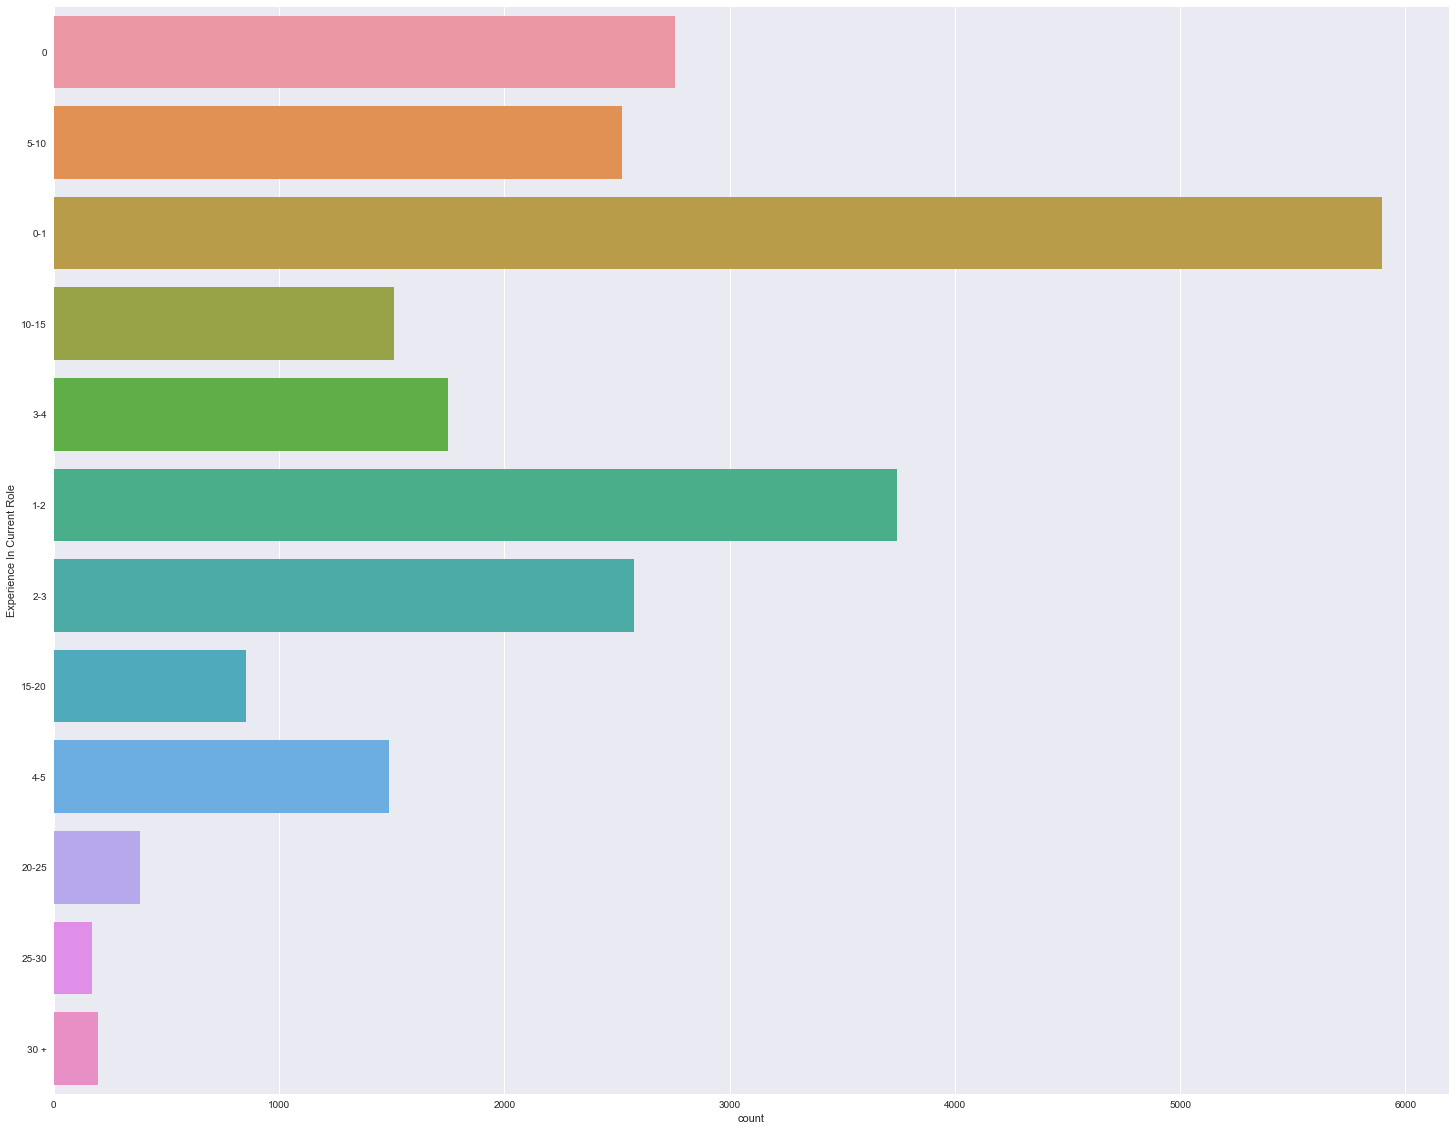

In [15]:
generate_horizontal_countplot(y=employmentDF.Experience_In_Current_Role,
                             figSize=(25,20),
                             ylabel = 'Experience In Current Role',
                             figName = 'Experience In Current Role.jpeg')

### What is your current yearly compensation?

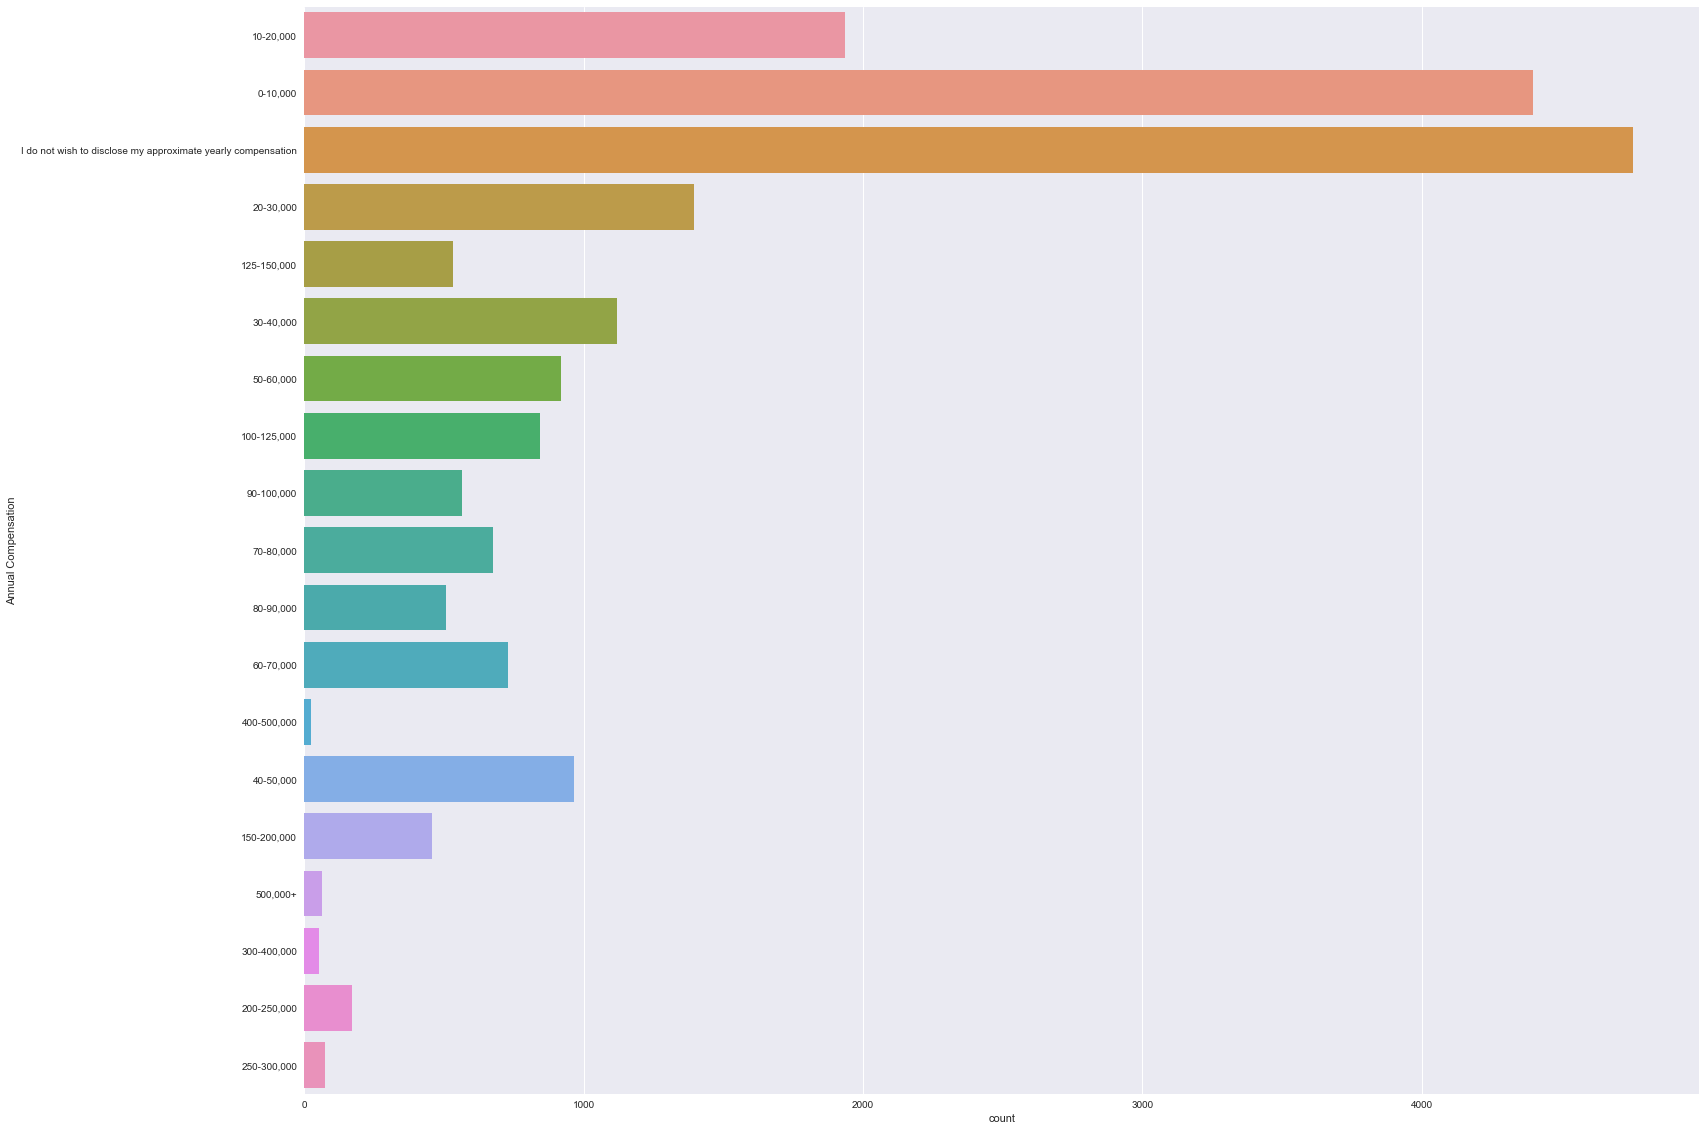

In [16]:
generate_horizontal_countplot(y=employmentDF.Annual_Compensation,
                             figSize=(25,20),
                             ylabel = 'Annual Compensation',
                             figName = 'Annual Compensation.jpeg')

### Does your current employer incorporate machine learning methods into their business?

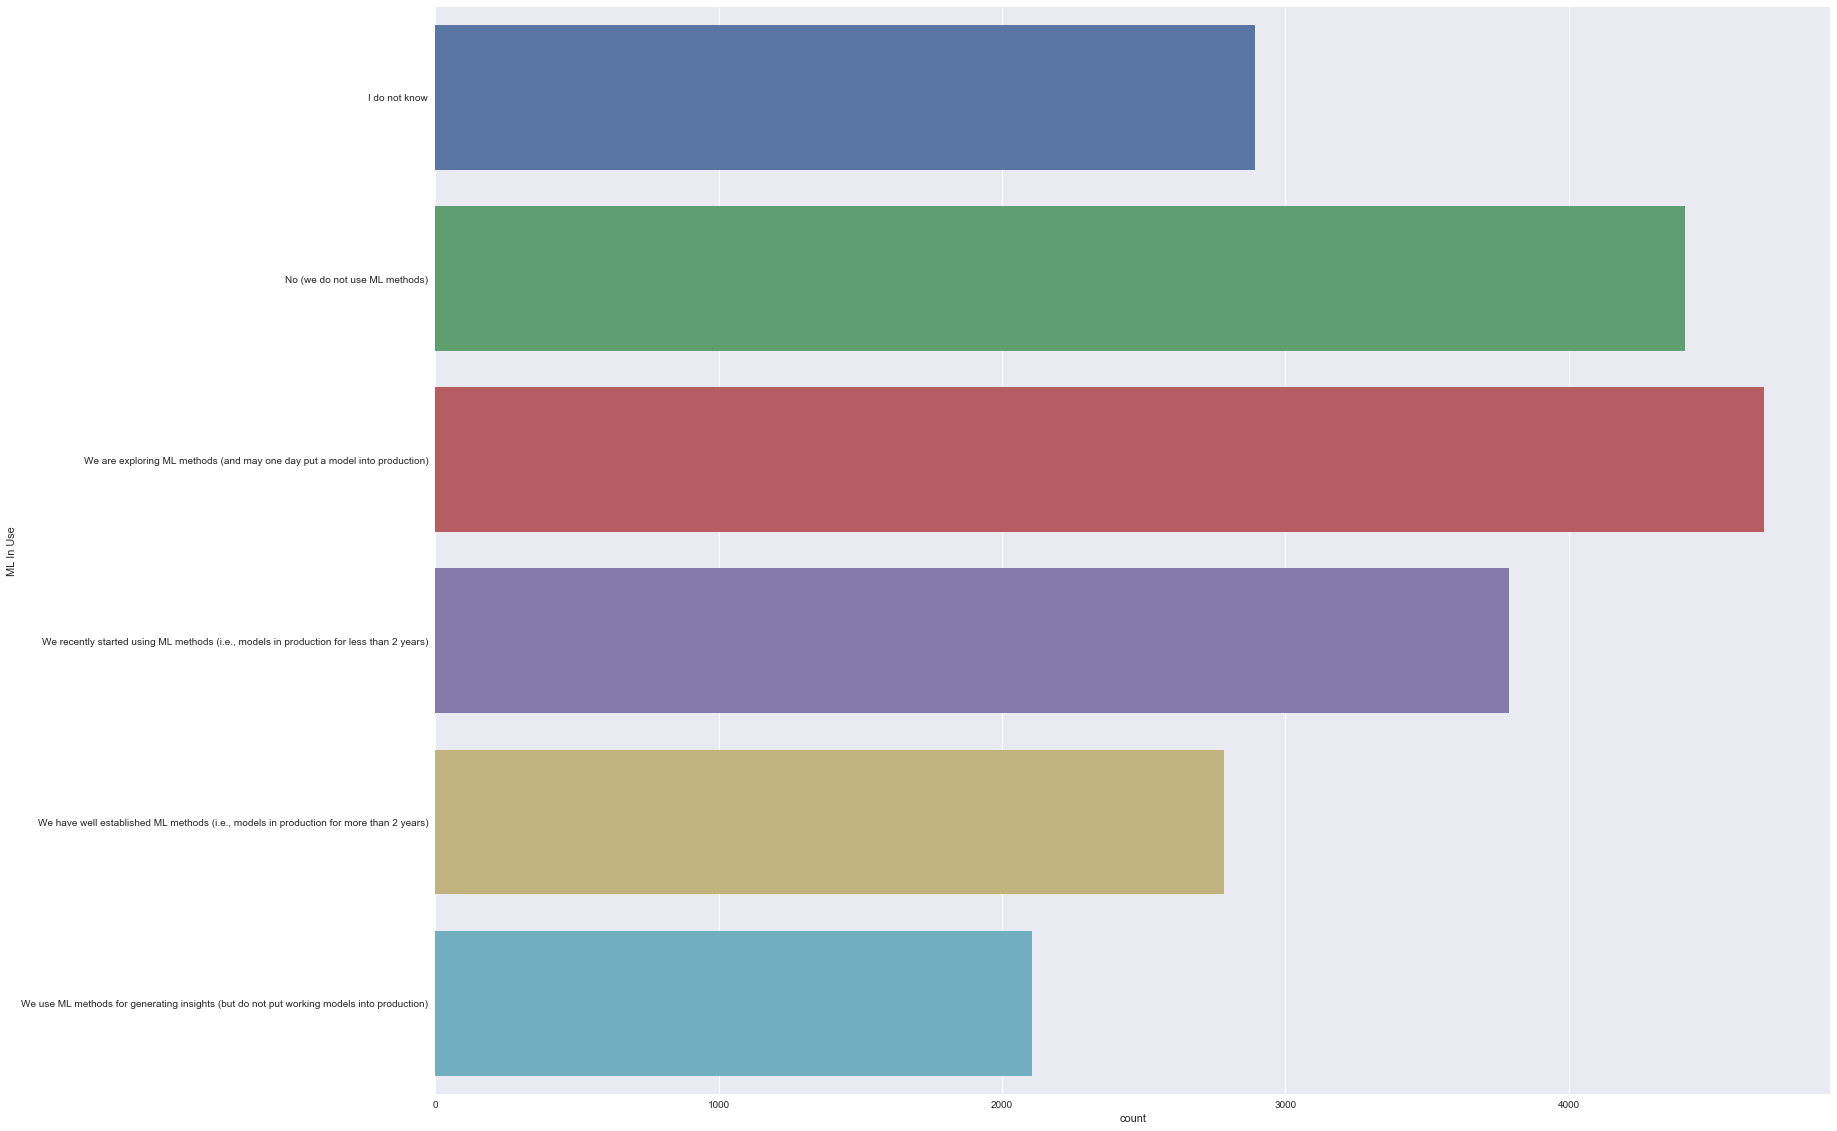

In [17]:
generate_horizontal_countplot(y=employmentDF.ML_In_Use,
                             figSize=(25,20),
                             ylabel = 'ML In Use',
                             figName = 'ML In Use.jpeg')

We will persist the clean copy of the dataframe as a CSV file. 

We no longer need "employmentDF" in the analysis. We will clean up from memory.

In [18]:
employmentDF.to_csv("employment.csv",index=False)

In [19]:
del employmentDF
gc.collect()

9463

### Select any activities that make up an essential part of your role at work

* __Analyze and understand data to influence product or business decisions__
* __Build and/or run a machine learning service that operationally improves my product or workflows__
* __Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data__
* __Build prototypes to explore applying machine learning to new areas__
* __Do research that advances the state of the art of machine learning__
* __None of these activities are an essential part of my role at work__
* __Other__

In [20]:
roleDF = multipleChoiceDF[['Q11_Part_1','Q11_Part_2','Q11_Part_3','Q11_Part_4','Q11_Part_5','Q11_Part_6','Q11_Part_7']]

In [21]:
roleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 7 columns):
Q11_Part_1    9533 non-null object
Q11_Part_2    5482 non-null object
Q11_Part_3    5234 non-null object
Q11_Part_4    7234 non-null object
Q11_Part_5    4935 non-null object
Q11_Part_6    3472 non-null object
Q11_Part_7    1193 non-null object
dtypes: object(7)
memory usage: 1.3+ MB


In [22]:
roleDF.head()

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7
0,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...
1,Analyze and understand data to influence produ...,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,Do research that advances the state of the art...,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN
3,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the visual and programmatic analysis:
* There are rows with missing data, but deviating from data we explored till now, missing information is expected per record as selections are optional. We will melt into one single column removing missing values, and use this column for analysis.
* All columns are loaded with the correct data type.
* Row with ID 0, is the same as the question. We will drop this row from the analysis as it does not have any empirical value.
* Column names are not informative, we will rename columns with more informative names.

In [23]:
roleDF.drop([0],inplace=True)
roleDF.reset_index(drop=True,inplace=True)

In [24]:
roleDF.head()

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7
0,Analyze and understand data to influence produ...,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,Do research that advances the state of the art...,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN
2,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [25]:
roleDF = pd.melt(roleDF)

In [26]:
roleDF.head()

,variable,value
0,Q11_Part_1,Analyze and understand data to influence produ...
1,Q11_Part_1,NaN
2,Q11_Part_1,Analyze and understand data to influence produ...
3,Q11_Part_1,NaN
4,Q11_Part_1,NaN


In [27]:
roleDF.drop(columns=['variable'],inplace=True)

In [28]:
roleDF.dropna(inplace=True)
roleDF.reset_index(drop=True,inplace=True)

In [29]:
roleDF.rename(columns={"value":"Role"},inplace=True)

__Day-to-day activities of a Data Scientist are derived from high-level Data Science project phases.__

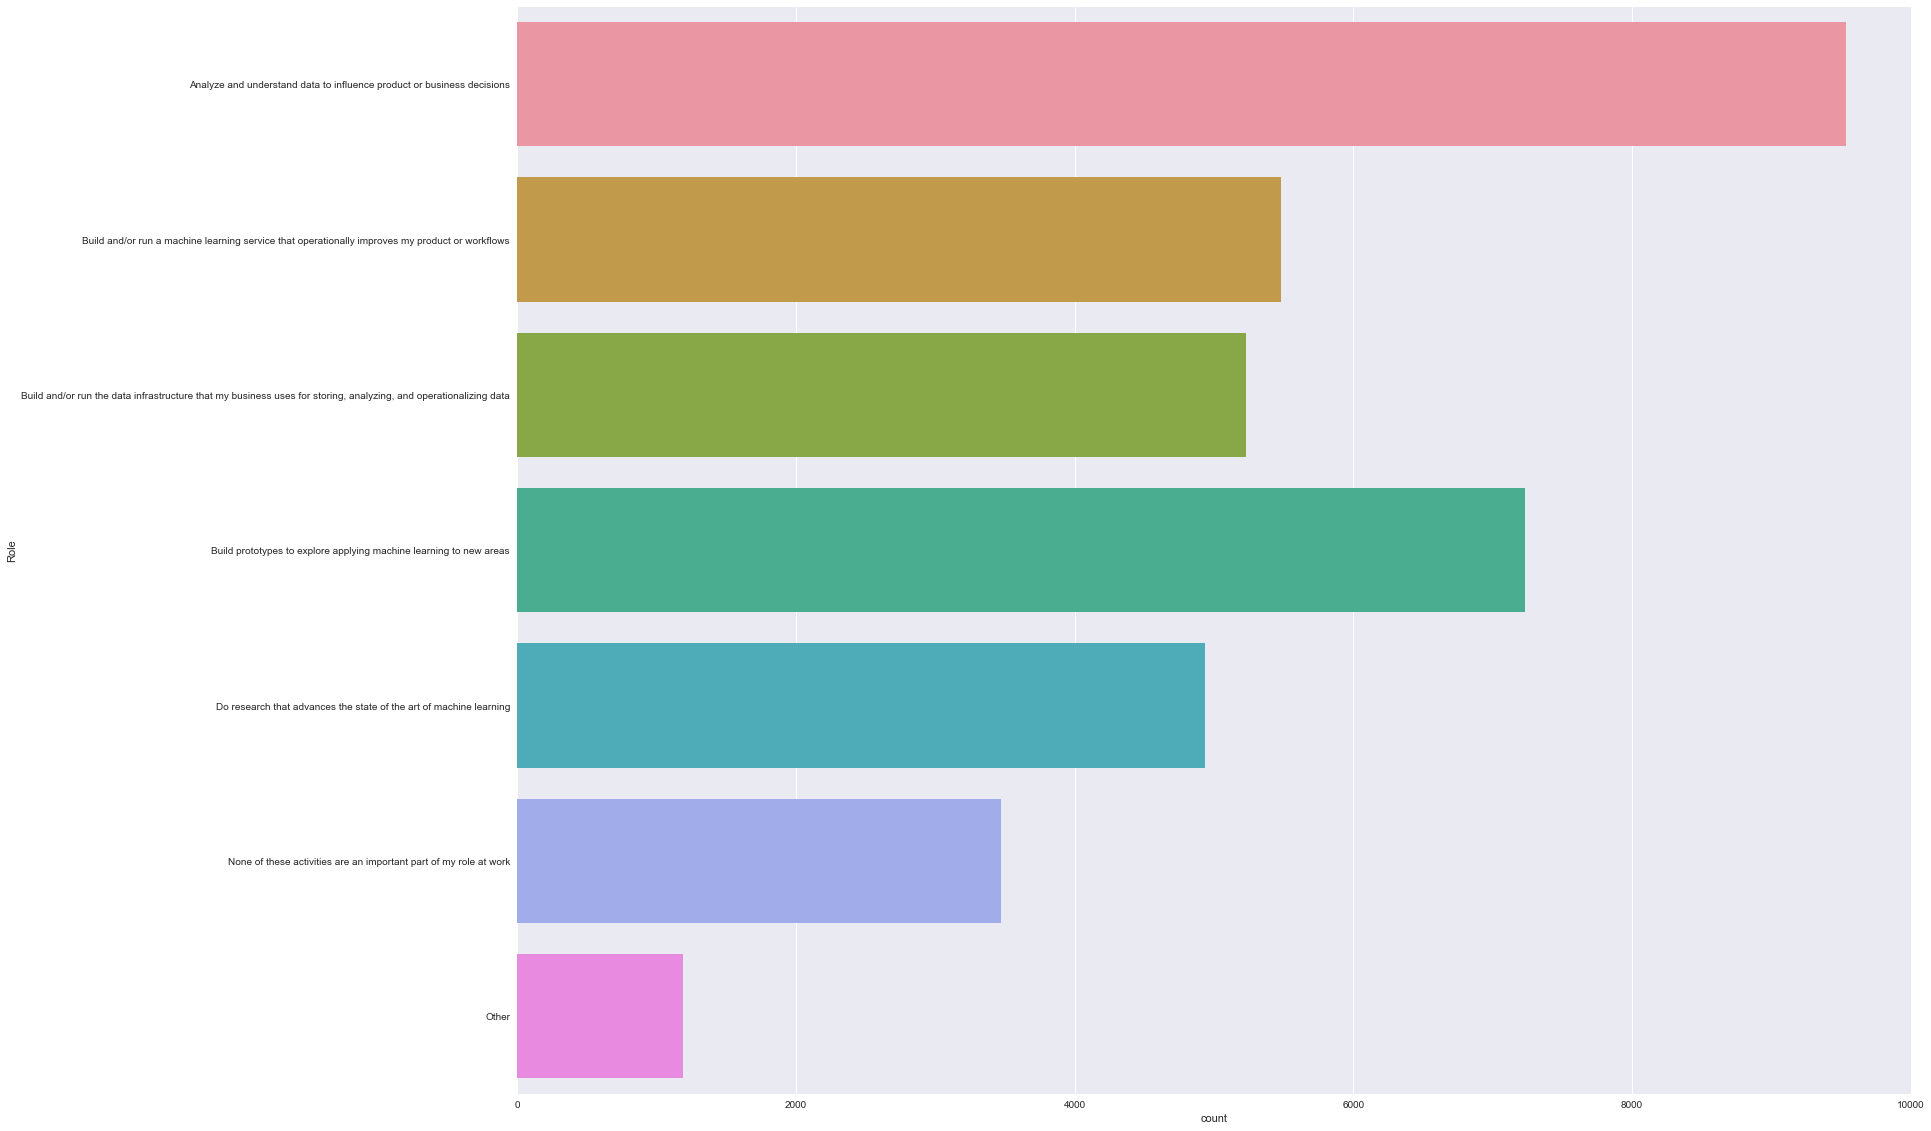

In [30]:
generate_horizontal_countplot(y=roleDF.Role,
                             figSize=(25,20),
                             ylabel = 'Role',
                             figName = 'Role.jpeg')

In [31]:
roleDF.to_csv("role.csv",index=False)

### Conclusion

In this notebook, we have analyzed the professional experience of the survey respondents.